Problem Statement:

Understanding product sales trends during Diwali is crucial for enhancing customer experience and increasing sales. However, a lack of data-driven insights may lead to missed opportunities for optimizing product offerings, pricing strategies, and marketing efforts. Therefore, a thorough analysis of Diwali sales is needed to identify key patterns, improve customer engagement, and boost overall revenue.










In [4]:
#importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Data Cleaning and Pre-Processing:

In [5]:
df = pd.read_csv(r'C:\Users\DELL\Downloads\Data Sceince project\Python_Diwali_Sales_Analysis\Diwali Sales Data.csv', encoding = 'unicode_escape') 

In [6]:
df.shape

(11251, 15)

In [7]:
df.head (10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


In [8]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [9]:
df.drop (['Status', 'unnamed1'], axis=1, inplace= True) # axis = 0 means row and 1 means column,
                                                     #inplace means Saving the data after dropping.

In [17]:
# to check again if the those two columns are dropped we re using info again
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [10]:
#Now I need to check the null values(empty) in the data. This is not good enough for us we need something more
pd.isnull(df)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,False,False,False,False,False,False,False,False,False,False,False,False,False
11247,False,False,False,False,False,False,False,False,False,False,False,False,False
11248,False,False,False,False,False,False,False,False,False,False,False,False,False
11249,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
pd.isnull(df).sum() # gives the total number of null values in the data set

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [12]:
#Now we are going to drop the null values using new function.
df.dropna(inplace=True)

In [13]:
df.shape
pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

As you can see 12 rows are deleted from it. Now we are going to change the data types of the data set.

In [14]:
#function astype change the type of any data from data set
df['Amount']=df['Amount'].astype('int')
#to check the the rye has changed or not? use dtypes
df['Amount'].dtypes

dtype('int32')

In [15]:
#It gives us all the basic statistical parameters such as count, mean, std.
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [16]:
# we dont need the Statistaical paramters of USer_ID and marital status so we are giong to ignore them.
# for specific columns, use
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


Now, we are giong to do Exploratory Data Analysis (EDA) using seaborn library.

In [17]:
df.columns


Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

Sales Analysis based on Gender:

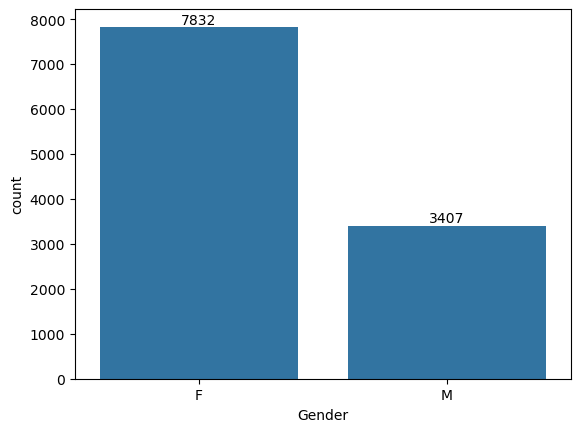

In [18]:
# For countplot
ax=sns.countplot(x= 'Gender', data = df)

for bars in ax.containers:
    ax.bar_label(bars)


In [19]:
df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

,Gender,Amount
0,F,74335853
1,M,31913276


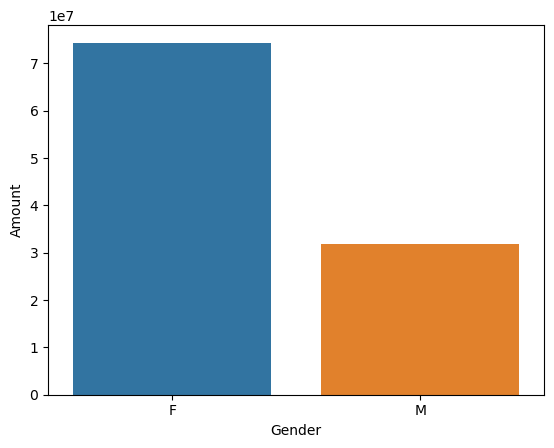

In [21]:
sales_gen=df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
ax=sns.barplot(x='Gender', y='Amount', data = sales_gen, hue='Gender')


Sales Analysis based on Age Group:

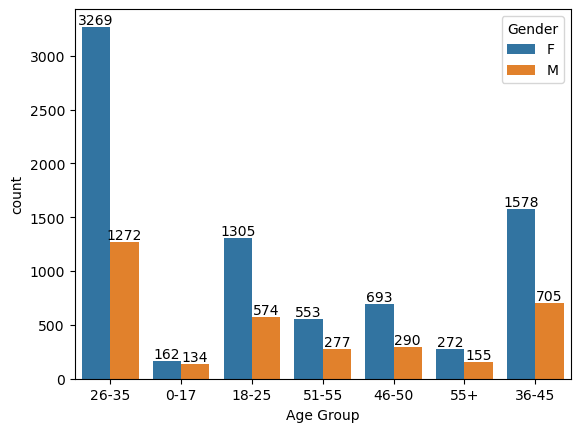

In [50]:
ax=sns.countplot(x= 'Age Group', data = df, hue='Gender')

for bars in ax. containers:
    ax.bar_label(bars)

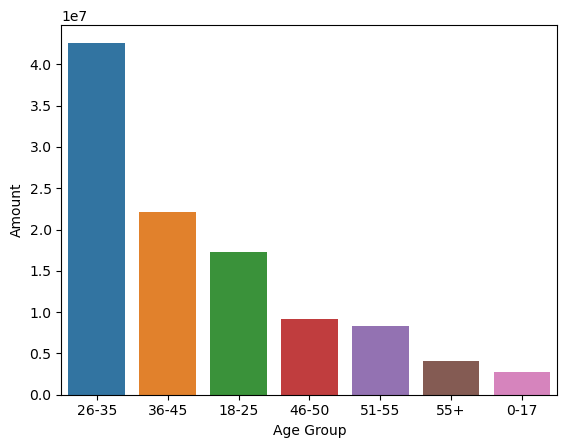

In [59]:
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

ax = sns.barplot(x='Age Group', y='Amount', hue='Age Group', data=sales_age, legend=False)


Sales Analysis based on States:

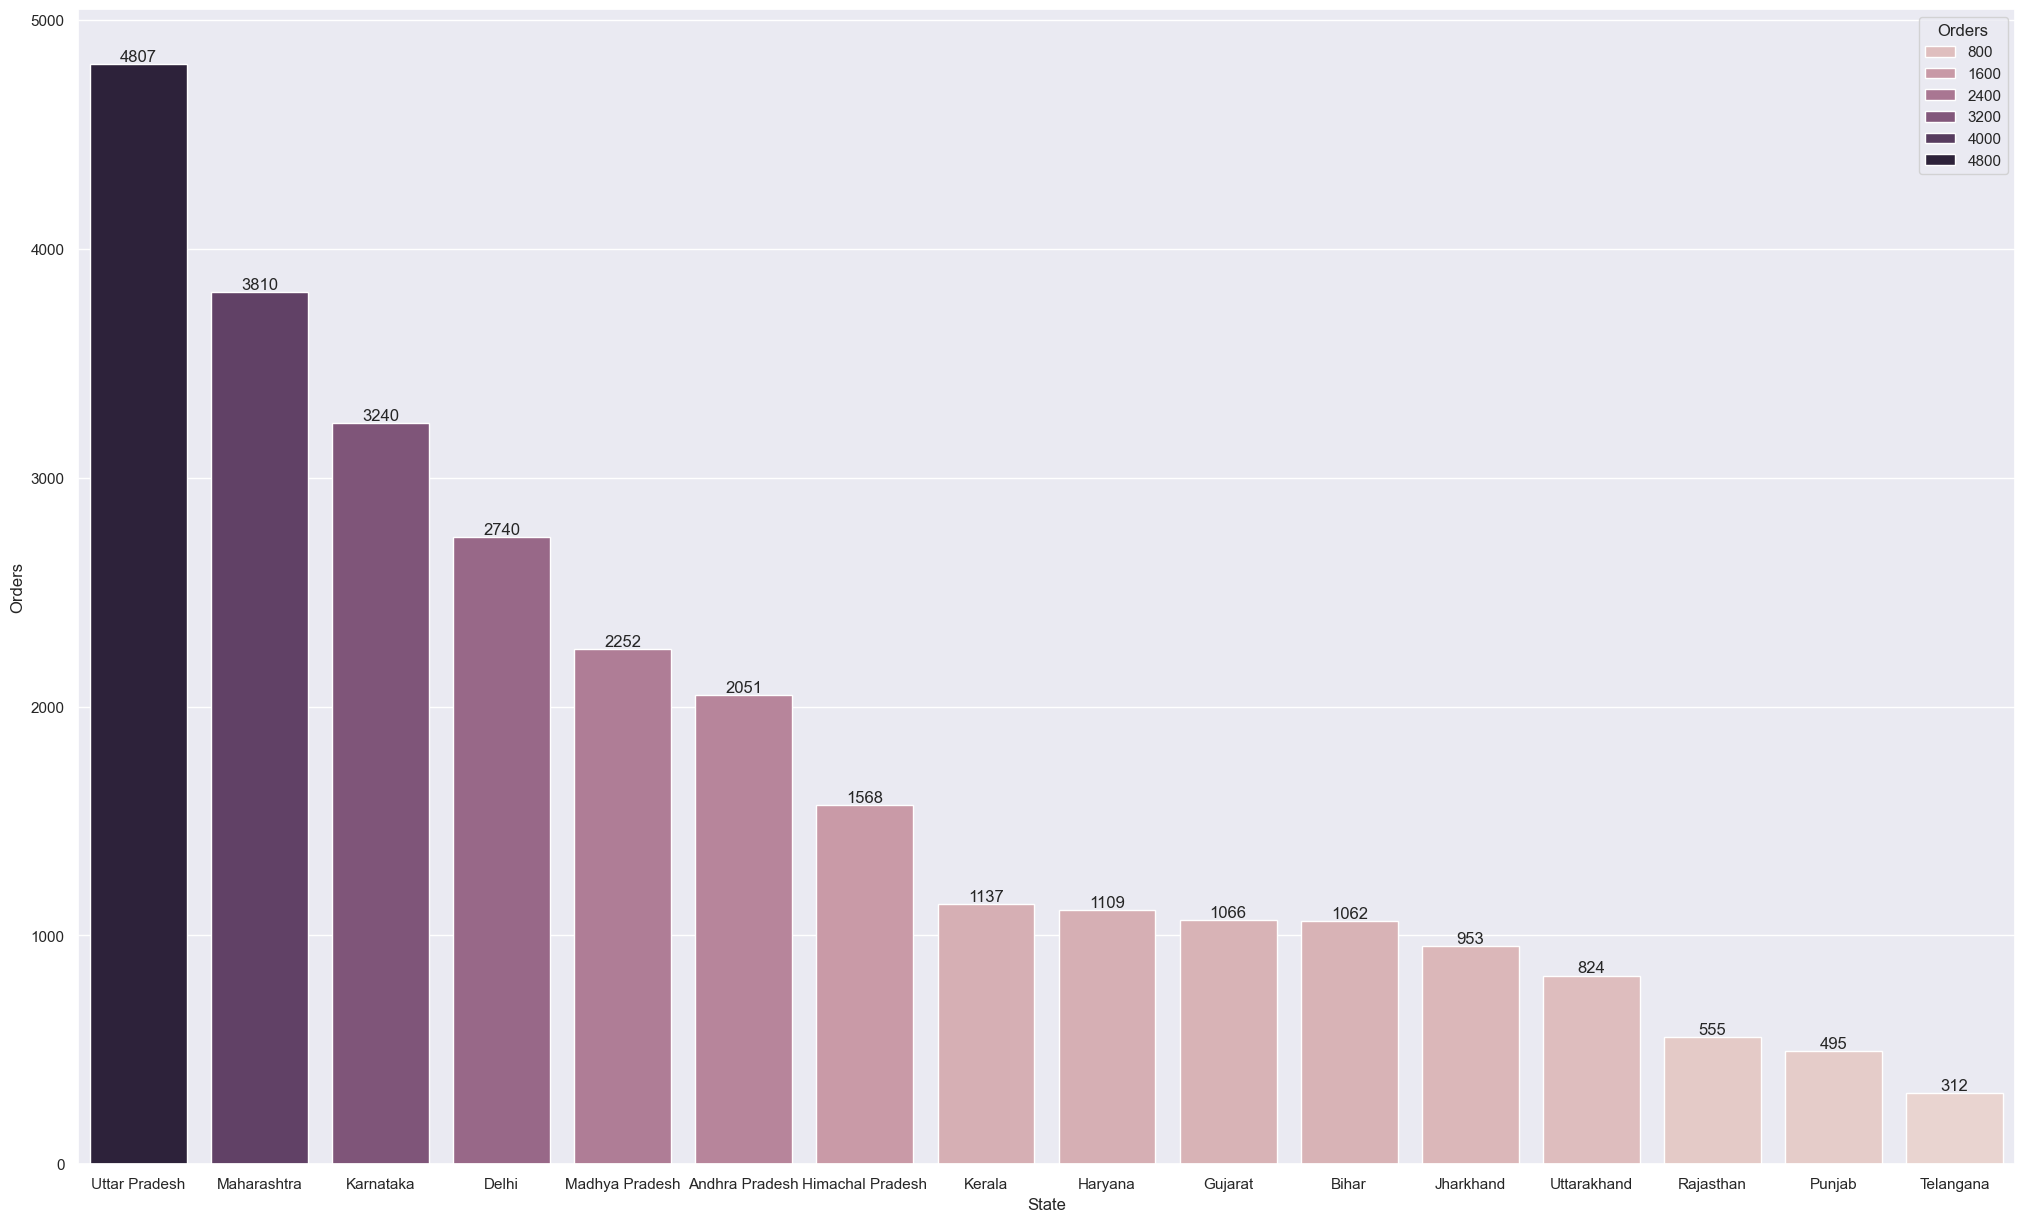

In [66]:
sales_state=df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False)

sns.set(rc={'figure.figsize':(25,15)})
ax=sns.barplot(data=sales_state, x='State',y='Orders', hue='Orders')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='State', ylabel='Amount'>

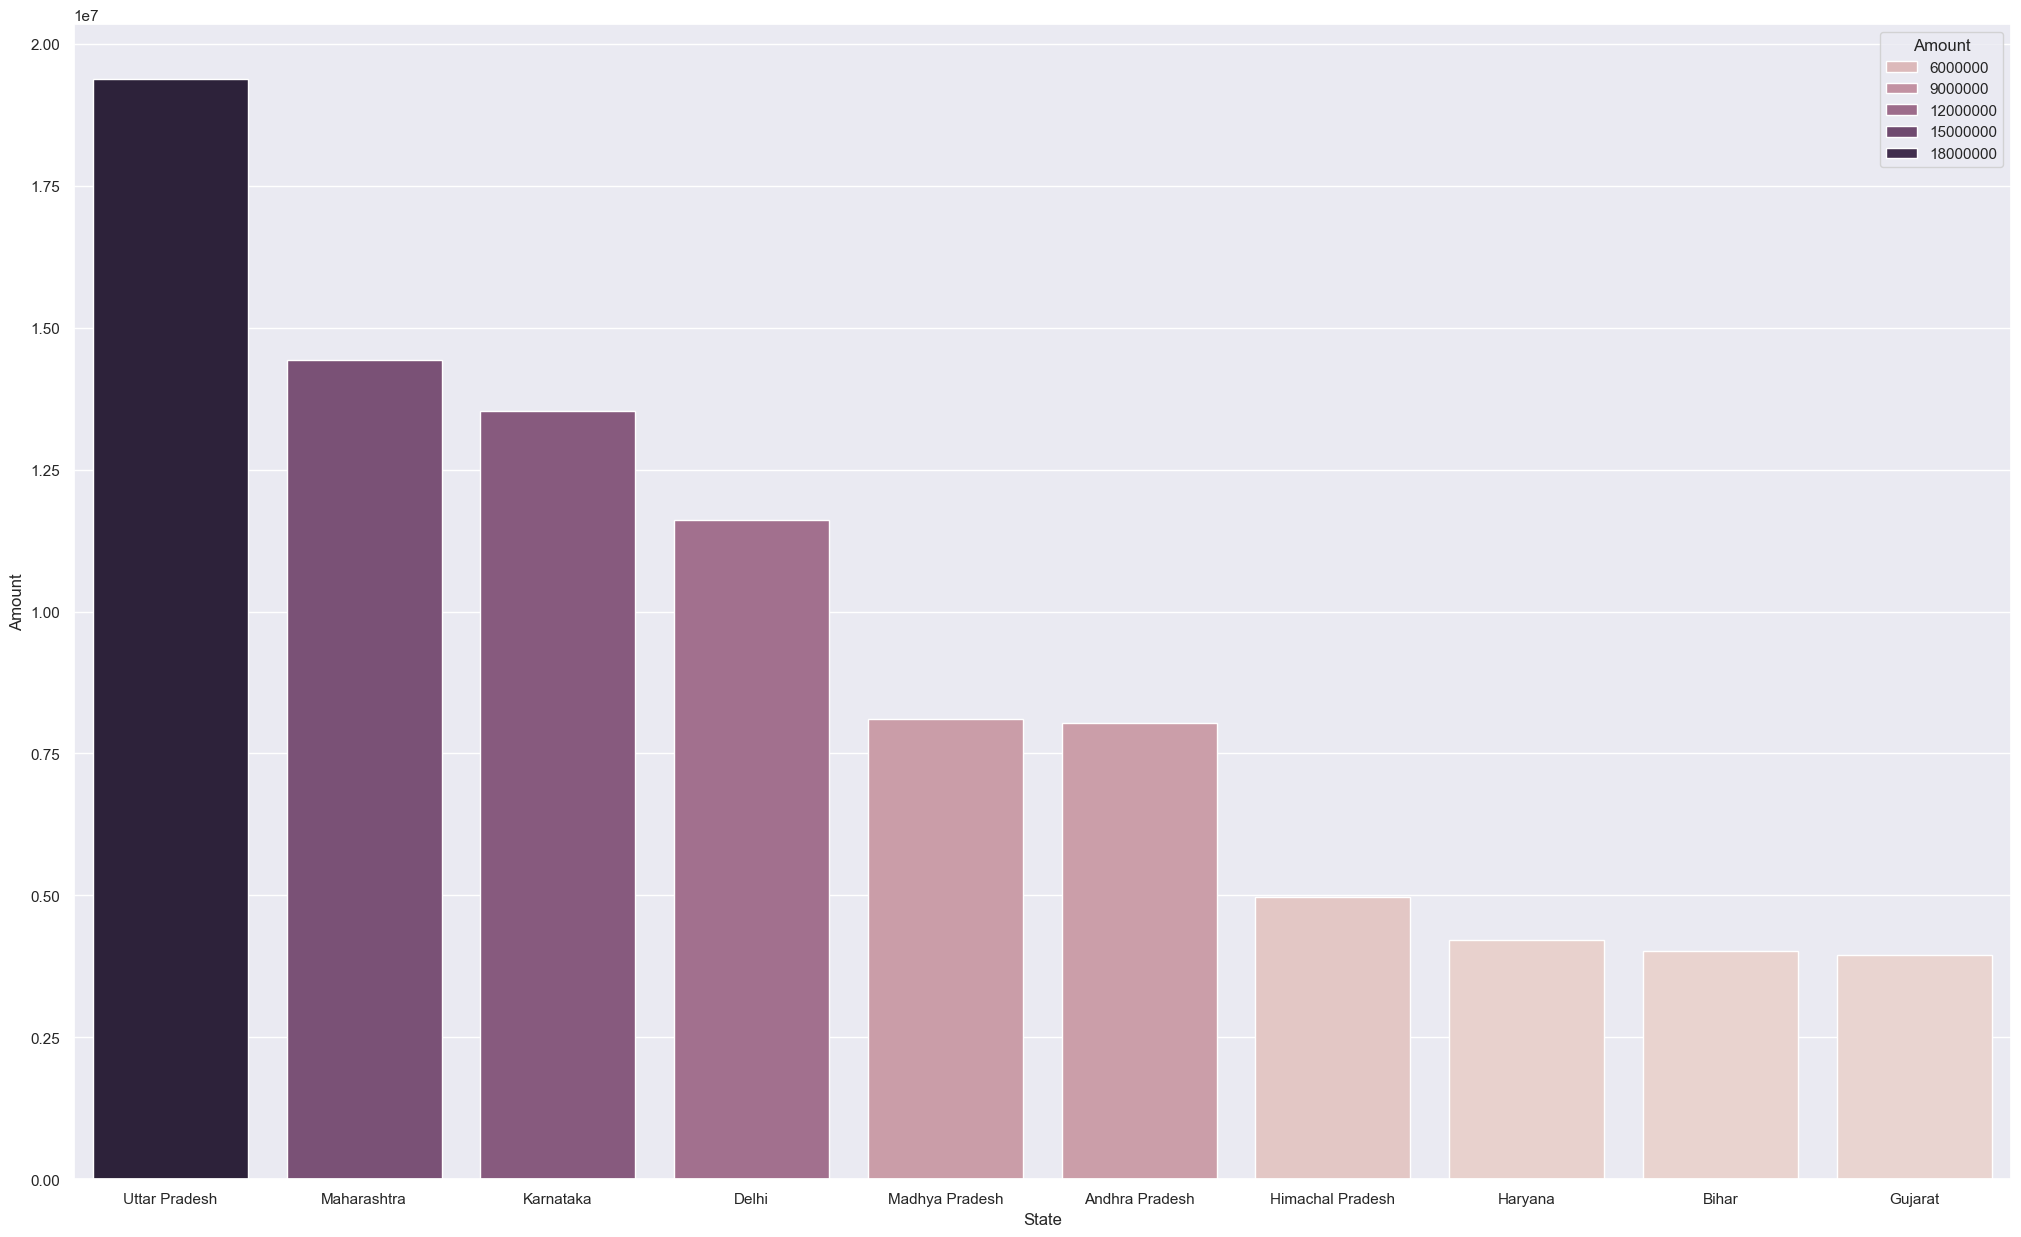

In [70]:
sales_state=df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(25,15)})
sns.barplot(data=sales_state, x='State',y='Amount', hue='Amount')


Sales Analysis based on Marital Status:

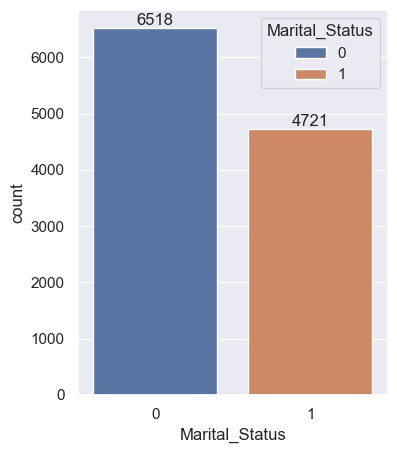

In [106]:
ax=sns.countplot(x= 'Marital_Status', data = df, hue='Marital_Status')

sns.set(rc={'figure.figsize':(5,5)})
for bars in ax. containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

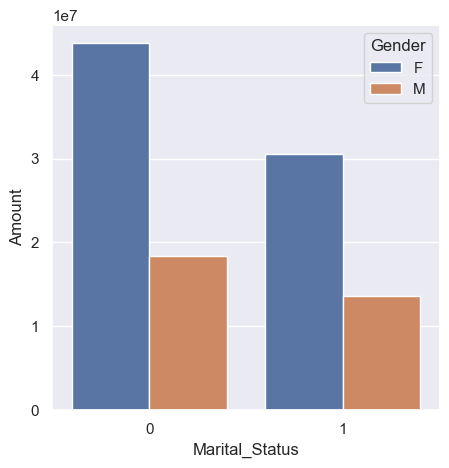

In [87]:
sales_state=df.groupby(['Marital_Status','Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(data=sales_state, x='Marital_Status',y='Amount', hue='Gender')

Sales Analysis based on Occupation:

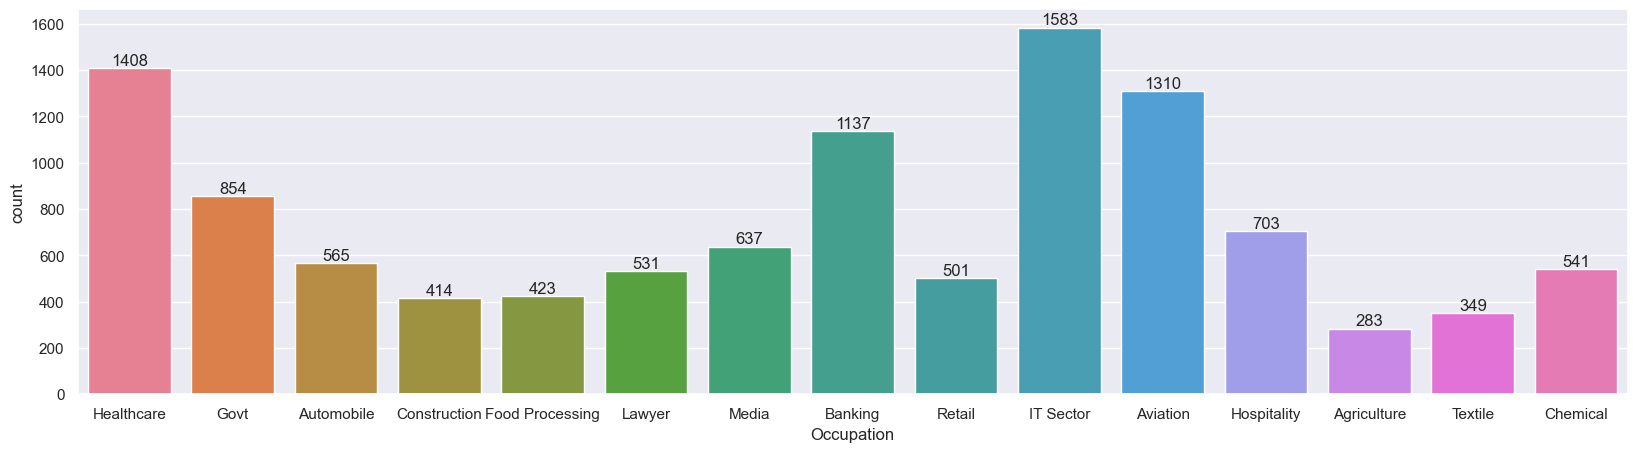

In [100]:
ax=sns.countplot(x= 'Occupation', data = df, hue='Occupation')
sns.set(rc={'figure.figsize':(30,10)})
for bars in ax. containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

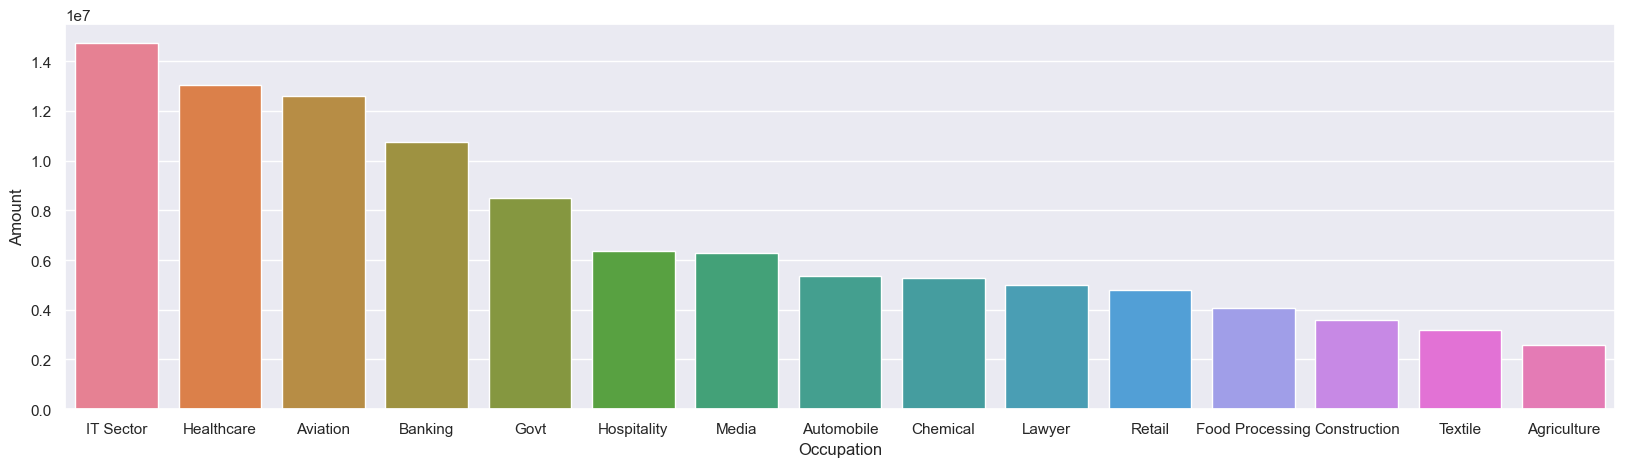

In [99]:
sales_state=df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=sales_state, x='Occupation',y='Amount', hue='Occupation')

Sales Analysis based on Product Category:

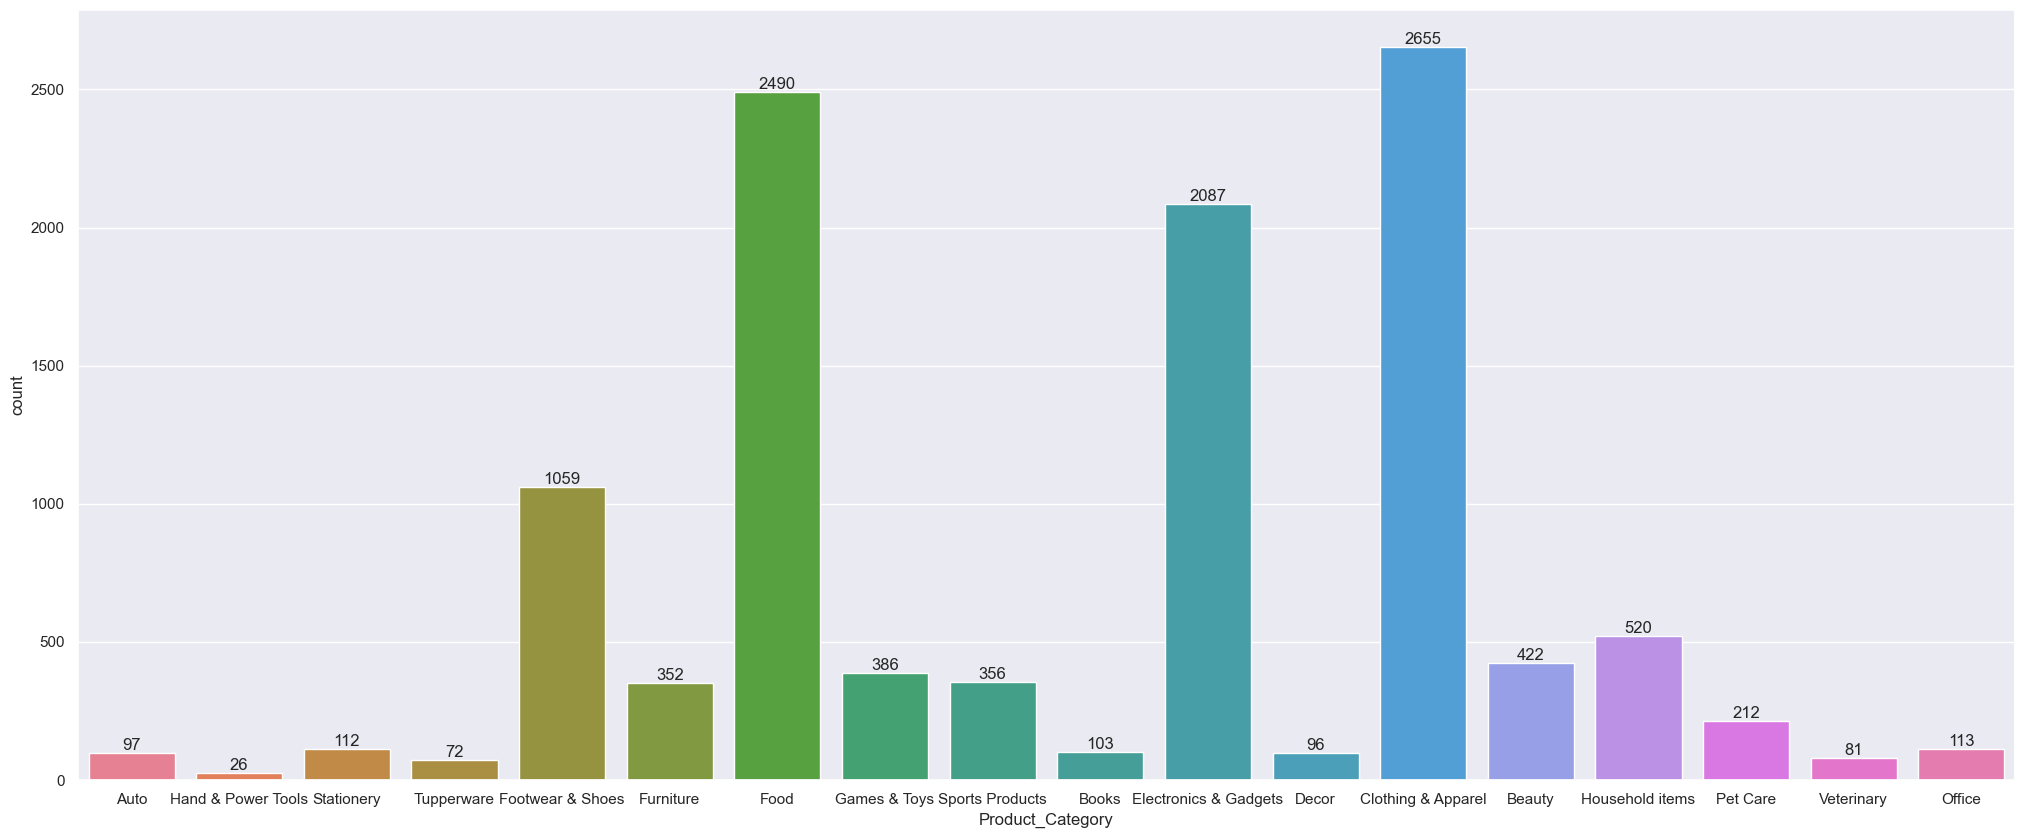

In [115]:
ax=sns.countplot(x= 'Product_Category', data = df, hue='Product_Category')
sns.set(rc={'figure.figsize':(30,10)})
for bars in ax. containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

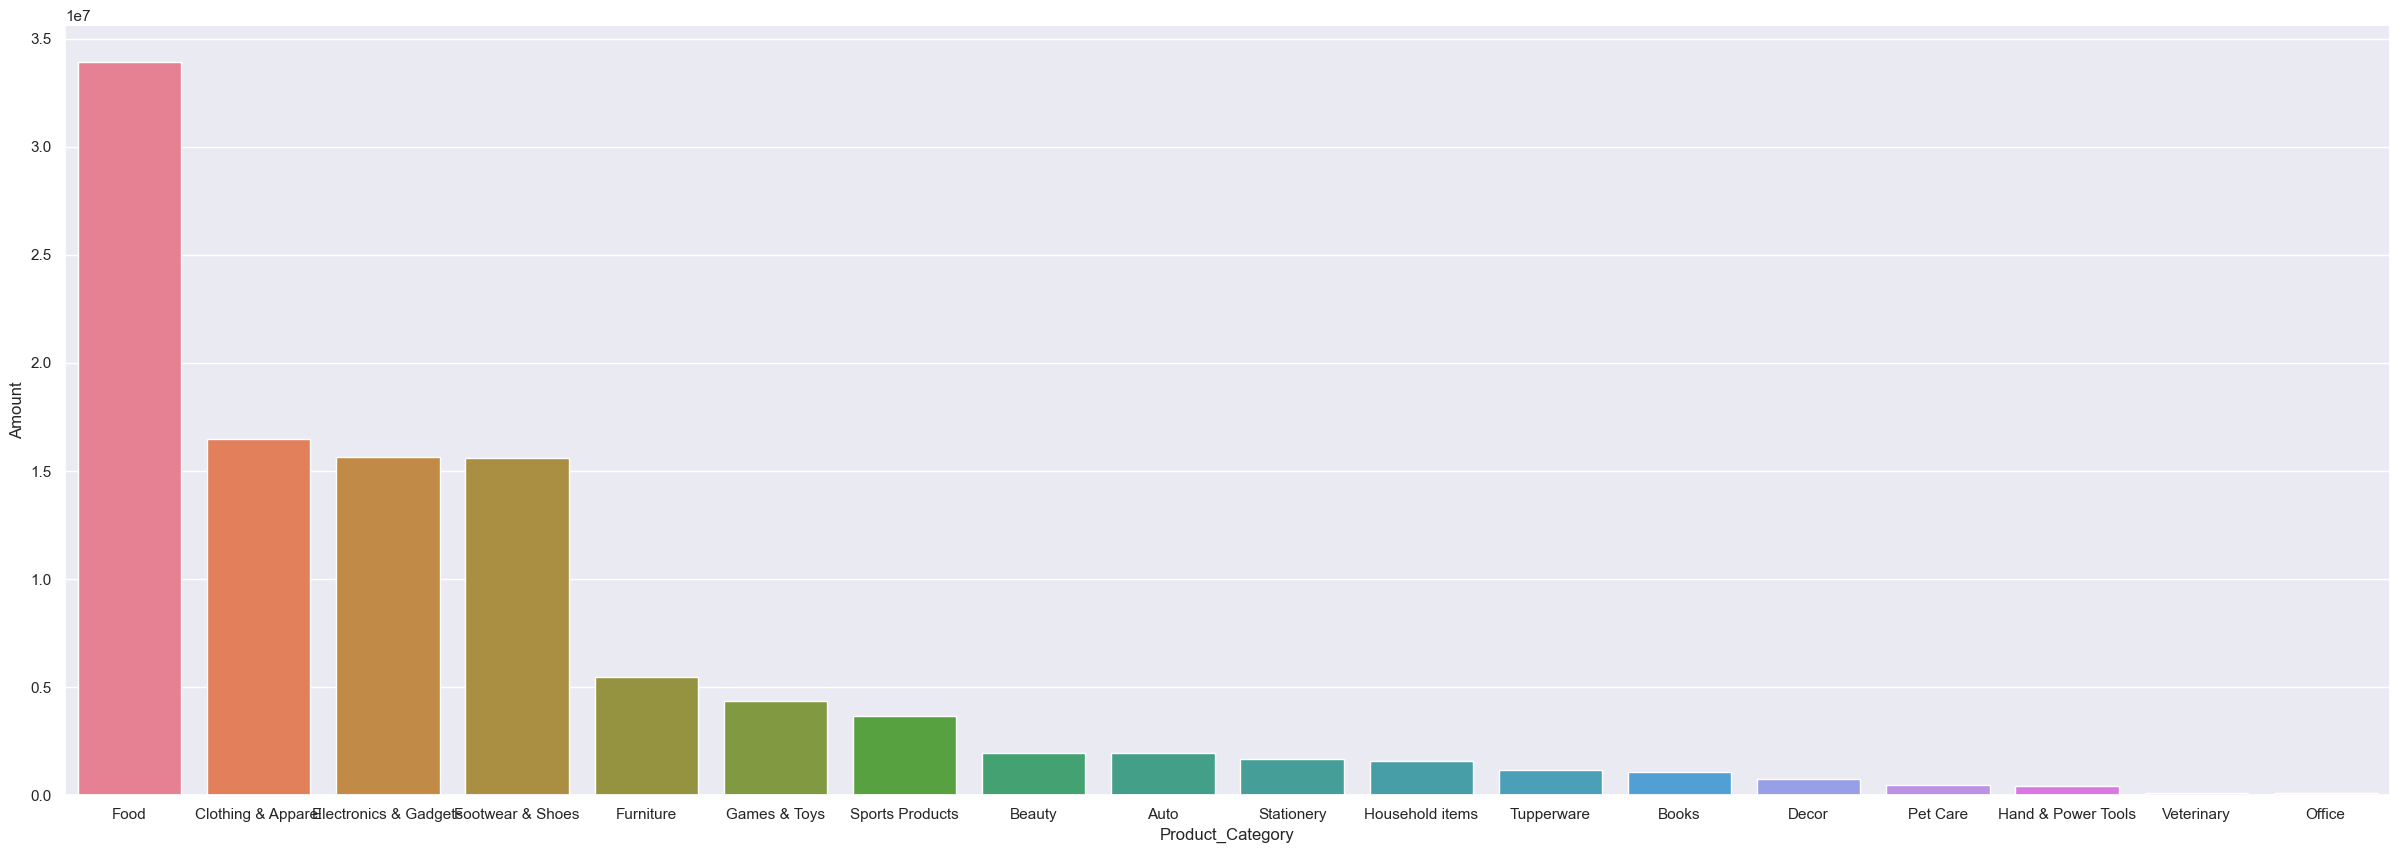

In [119]:
sales_state=df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(30,10)})
sns.barplot(data=sales_state, x='Product_Category',y='Amount', hue='Product_Category')

Conclusion:

After completing the analysis, we concluded that married women in the age group of 26-35 from UP, Maharashtra, and Karnataka working in the IT, Healthcare, and Aviation sectors are most likely to buy products from the food, clothing, and Electronics Categories.